In [1]:
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut

import sys, os
import pandas as pd
import mlflow
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from read_write_util import ReadWriteUtil
from modeling_util import *

In [2]:
reader = ReadWriteUtil()
df_train = reader.dvc_get_data('../data/train.csv', 'v3merged')
df_train

2022-09-08 09:54:50,308:logger:../data/train.csv with version v3merged Loaded


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,2,0,0,0,0,a,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,3,5530,668,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
2,1,4,4327,578,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
3,1,5,4486,619,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
4,1,6,4997,635,1,0,0,1,2013,1,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,10712,608,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017205,1115,2,8093,500,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017206,1115,3,7661,473,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12
1017207,1115,4,8405,502,1,1,0,1,2015,7,...,1900,1,22,2012,"Mar,Jun,Sept,Dec",1,3,6,9,12


In [3]:
df_train.set_index('Year', inplace=True)
df_train.shape

(1017209, 26)

In [4]:
x = df_train.drop(columns=['Sales','Customers'])
y = df_train['Sales']

In [5]:
model = RandomForestRegressor(n_estimators = 10)
str(model)

'RandomForestRegressor(n_estimators=10)'

In [6]:
try:
    mlflow.end_run()
except:
    pass

2022-09-08 09:54:54,749:logger:Piplined retrieved
2022-09-08 09:55:46,899:logger:RMSE Score: 956.2889036030075
2022-09-08 09:55:46,902:logger:R2_Squared: 0.9384032368195027
2022-09-08 09:55:46,905:logger:MAE Score: 579.2189928005689
2022-09-08 09:55:46,923:logger:Accuracy: 89.43 %.
2022-09-08 09:55:47,582:logger:feature importance plotted


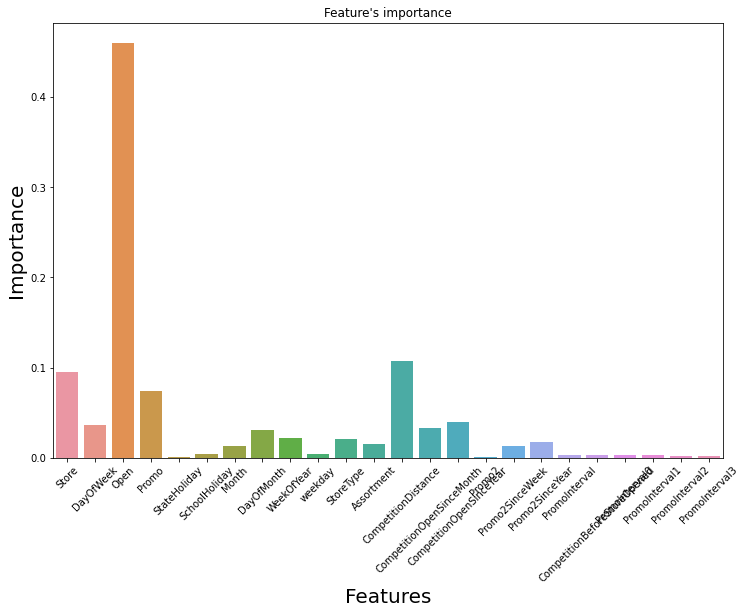

/home/n/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


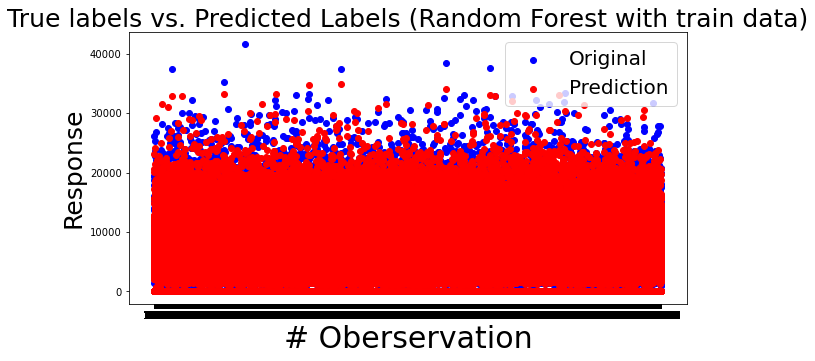

2022-09-08 10:26:38,949:logger:plotted prediction vs true labels
/home/n/anaconda3/lib/python3.9/site-packages/mlflow/tracking/client.py:1267: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.savefig(tmp_path)
/home/n/Documents/10_Academy/Sales-Prediction/scripts/modeling_util.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  pred_plot.savefig("../images/predictions_plot.png")


In [7]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with train data',
                run_name='RandomForestRegressor(n_estimators=10)')
mlflow.end_run()